## Syllabus

*   Tell a story with data and visualization
*   Python visualization framework and the environment setup
*   基础：matplotlib and pandas plot
*   进阶：seaborn
*   作图实例





## Tell a story


*   Engage your audience with hierarchical summarized insights. 
*   Process:

> 1. Organize your initial story and insights.
> 2. Who is your audience? What are they interested in? 
> 3. What's the high-level insights(don't worry about the details at this moment)?
> 4. What's the correlation between your insights?
> 5. How will your insights change your audience's mind or help them make decision? 





## 可视化的基本原则

*   Story focus, supported by visualization
*  Data dimensions in a chart: 2D
*  Preattentive attributes: color, highlight
*  Less is more: remove distraction




## Do & Don't in Visualization


*   Use simple 2D barchart <br>
![alt text](https://www.tutorialspoint.com/r/images/barchart.png)<br>
Do not use 3D barchart <br>
![alt text](https://i.stack.imgur.com/BumCd.png)

*  Use preattentive attibutes: color, highlight<br>
![alt text](https://vrzkj25a871bpq7t1ugcgmn9-wpengine.netdna-ssl.com/wp-content/uploads/2018/05/ggplot-bar-chart-with-highlighted-bar-600x444.png)<br>
Do not highlight too much <br>
![alt text](https://docs.servicenow.com/bundle/geneva-performance-analytics-and-reporting/page/use/basic_reporting/image/BarChart.png) <br>

* Do: less is more<br>
![alt text](https://static1.squarespace.com/static/55b6a6dce4b089e11621d3ed/t/58dbf1ffbf629a91c22f8324/1490810045071/Declutter+GIF+1.png?format=750w)<br>

Do not include distraction<br>
![alt text](https://static1.squarespace.com/static/55b6a6dce4b089e11621d3ed/t/58dbf3b82994ca7505dc6920/1490809790004/?format=750w)<br>








In [0]:
#@title Import packages
import numpy as np, pandas as pd
from matplotlib import pylab
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import seaborn as sns

import scipy.stats as stats
import statsmodels as sm
from __future__ import division
# plt.style.use('ggplot')
# https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html
import warnings
warnings.filterwarnings('ignore')

## Basic: Matplotlib

Stateful vs stateless(OOP) approach

*   Stateful approach
<br>plt.plot(x=,y=, color=, marker=,linestyle=,linewidth,markersize=)
<br>优点：简单快捷
<br>缺点：缺乏灵活性

*   Stateless(OOP) approach：作图的元素

![alt text](https://files.realpython.com/media/fig_map.bc8c7cabd823.png)
1. fig, ax = plt.subplots(nrow,ncol,figsize=(5, 3))
<br>fig: 给我一张画布; ax：画布上要有几个图
2. 将ax看成object, 添加plot,legend, set_xlabel, set_ylabel

Text(0.5,1,'Three curves')

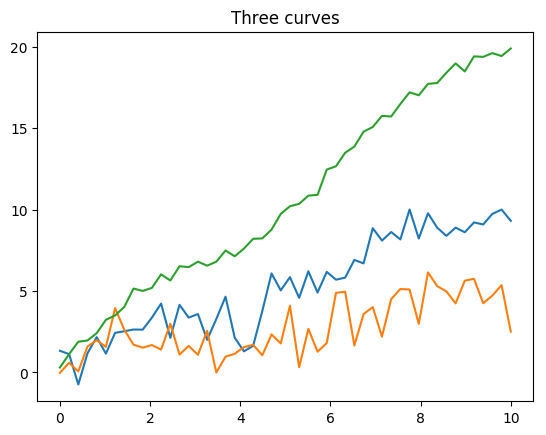

In [0]:
## Comparison between stateful and stateless approach
x=np.linspace(0,10,50)
np.random.seed(10)
# stateful
plt.plot(x,np.sin(x)+x+np.random.randn(50))
plt.plot(x,np.sin(x)+0.5*x+np.random.randn(50))
plt.plot(x,np.sin(x)+2*x+np.random.rand(50))
plt.title("Three curves")

plt.show()

Text(0.5,1,'Three curves')

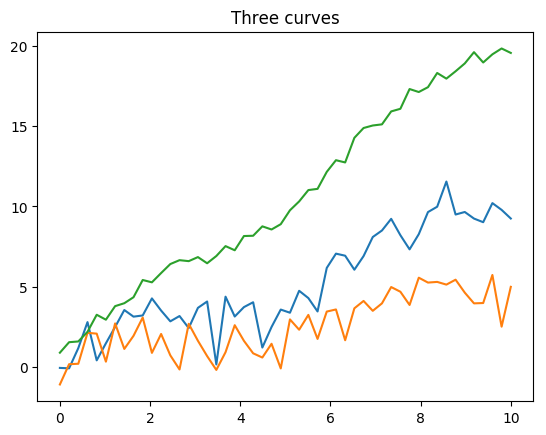

In [0]:
# stateless
fig,ax0=plt.subplots(nrows=1) # if multiple plots, return an array to ax
ax0.plot(x,np.sin(x)+x+np.random.randn(50))
ax0.plot(x,np.sin(x)+0.5*x+np.random.randn(50))
ax0.plot(x,np.sin(x)+2*x+np.random.rand(50))
ax0.set_title("Three curves")

plt.show()

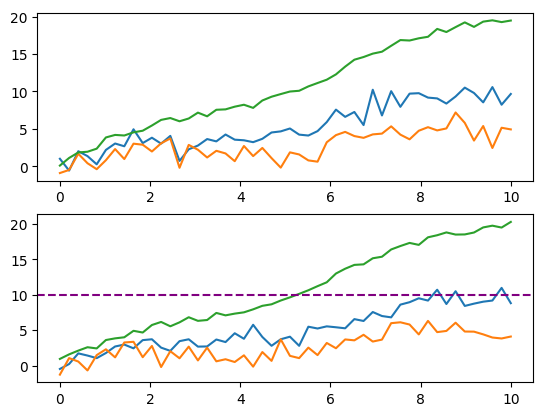

In [0]:
## Plot multiple charts on the same figure
# 混合用：stateful and stateless
fig=plt.figure()
plt.subplot(211) # two rows and one column, [0,1]
plt.plot(x,np.sin(x)+x+np.random.randn(50))
plt.plot(x,np.sin(x)+0.5*x+np.random.randn(50))
plt.plot(x,np.sin(x)+2*x+np.random.rand(50))

ax0=fig.add_subplot(212) # two rows and one column, [1,1]
ax0.plot(x,np.sin(x)+x+np.random.randn(50))
ax0.plot(x,np.sin(x)+0.5*x+np.random.randn(50))
ax0.plot(x,np.sin(x)+2*x+np.random.rand(50))
plt.axhline(y=10,color='purple',linestyle='--') # 可以放其他数值，比如平均数，中位数之类的。

plt.show()


### 调节coordinate objects


*   adjust background color
*   adjust gridline
*   set x-axis label and y-axis label
*   adjust x-axis and y-axis ticks


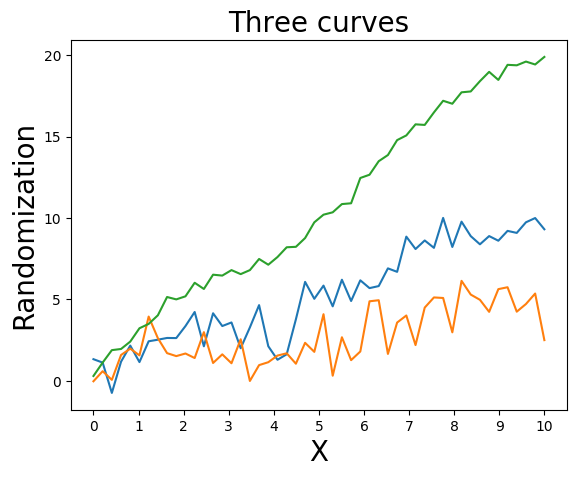

In [0]:
x=np.linspace(0,10,50)
np.random.seed(10)
fig,ax0=plt.subplots(nrows=1)
ax0.plot(x,np.sin(x)+x+np.random.randn(50))
ax0.plot(x,np.sin(x)+0.5*x+np.random.randn(50))
ax0.plot(x,np.sin(x)+2*x+np.random.rand(50))
ax0.set_title("Three curves",fontsize=20)

# 1. adjust gridline type: dotted-line
# ax0.grid(color='gray', alpha=0.5, linestyle='dotted') # alpha to adjust grid transparency
# or hide the grid: ax0.grid(False)
# 2. set x-axis label and y-axis label
ax0.set_xlabel('X')
ax0.set_ylabel('Randomization')
ax0.xaxis.label.set_size(20) # set xlabel size
ax0.yaxis.label.set_size(20) # set xlabel size
# # 3. adjust x-axis and y-axis data range
ax0.set_xticks(np.arange(min(x),max(x)+1,1))

plt.show() # used to suppress 


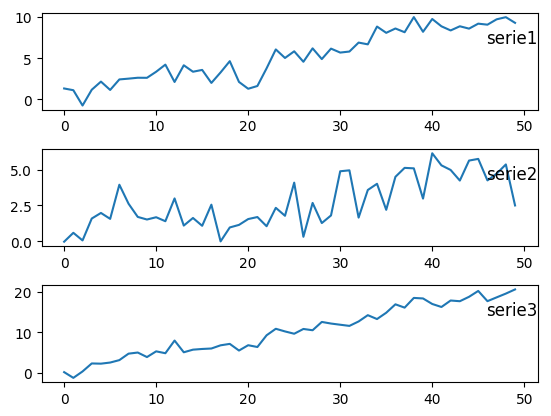

In [0]:
## 用for loop to subplot
x=np.linspace(0,10)
np.random.seed(10)
# 生成数据
y1=np.sin(x)+x+np.random.randn(50)
y2=np.sin(x)+0.5*x+np.random.randn(50)
y3=np.sin(x)+2*x+np.random.randn(50)

df=pd.DataFrame({'serie1':y1,'serie2':y2,'serie3':y3})

fig=plt.figure()
fig.subplots_adjust(hspace=0.4)

i=1
for col in df.columns:
  plt.subplot(df.shape[1],1,i)
  plt.plot(df.loc[:,col])
  plt.title(col,y=0.6,loc='right')
  i+=1
  
fig.show()

### Visualization case with Matplotlib
dataset: dummy UK user bank [account](http://www.superdatascience.com/wp-content/uploads/2015/06/UK-Bank-Customers.csv)
Balance sliced by 

*   Gender
*   Region
*   Job Classification
*   Gender + Region
*   Age group + Gender



In [0]:
# Import data using Pandas. csv file is in a Google Drive
file_id='13WIX0uQaA4ROvsfVjqPUwbmyW07XMc9S'
link='https://drive.google.com/uc?export=download&id={FILE_ID}'
csv_url=link.format(FILE_ID=file_id)
df = pd.read_csv(csv_url)
df.head()

,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance
0,100000001,Simon,Walsh,Male,21,England,White Collar,05.Jan.15,113810.15
1,400000002,Jasmine,Miller,Female,34,Northern Ireland,Blue Collar,06.Jan.15,36919.73
2,100000003,Liam,Brown,Male,46,England,White Collar,07.Jan.15,101536.83
3,300000004,Trevor,Parr,Male,32,Wales,White Collar,08.Jan.15,1421.52
4,100000005,Deirdre,Pullman,Female,38,England,Blue Collar,09.Jan.15,35639.79


In [0]:
# Data preprocessing:  rename columns, create age group
df.columns=['cust_id','first_name','last_name','gender','age','region','job','date_join',
           'balance']
df['age_group'] = pd.cut(df['age'], bins=[15, 30, 50, float('Inf')], labels=['15-30', '30-50', 'Above 50'])


In [0]:
df.head()

,cust_id,first_name,last_name,gender,age,region,job,date_join,balance,age_group
0,100000001,Simon,Walsh,Male,21,England,White Collar,05.Jan.15,113810.15,15-30
1,400000002,Jasmine,Miller,Female,34,Northern Ireland,Blue Collar,06.Jan.15,36919.73,30-50
2,100000003,Liam,Brown,Male,46,England,White Collar,07.Jan.15,101536.83,30-50
3,300000004,Trevor,Parr,Male,32,Wales,White Collar,08.Jan.15,1421.52,30-50
4,100000005,Deirdre,Pullman,Female,38,England,Blue Collar,09.Jan.15,35639.79,30-50


In [0]:
# Balance vs region: Barchart
dt_region_mean_bal=df.groupby(['region'])['balance'].mean()
dt_region_mean_bal = dt_region_mean_bal.reset_index()
dt_region_mean_bal['balance']=np.rint(dt_region_mean_bal['balance'])
dt_region_mean_bal


,region,balance
0,England,39293.0
1,Northern Ireland,39505.0
2,Scotland,39511.0
3,Wales,42390.0


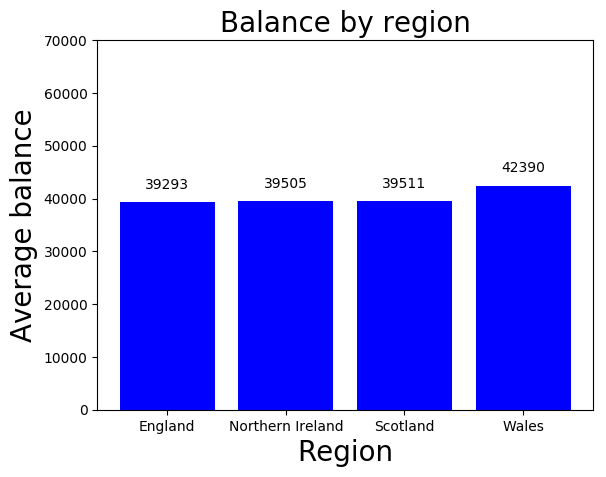

In [0]:
fig,ax0=plt.subplots(nrows=1)
ax0.bar(dt_region_mean_bal['region'],dt_region_mean_bal['balance'])
# adjust: xlabel, ylabel,y-axis scale; adjust background color
# add title
ax0.set_title("Balance by region",fontsize=20)
ax0.set_xlabel('Region')
ax0.set_ylabel('Average balance')
ax0.xaxis.label.set_size(20) # set xlabel size
ax0.yaxis.label.set_size(20) # set xlabel size
ax0.set_ylim(top=70000)
ax0.grid(False)

# what about data label?
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    先找中点，然后计算出数值，最后把数值放在bar上
    """
    for rect in rects:
        height = rect.get_height()
        ax0.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

rect1=ax0.bar(dt_region_mean_bal['region'],dt_region_mean_bal['balance'],color='blue')
autolabel(rect1)
plt.show()

In [0]:
# Balance vs ( Region + Gender): Bar chart with multiple X
dt_rg_mean=df.groupby(['region','gender'])['balance'].mean()
dt_rg_mean=dt_rg_mean.reset_index()
dt_rg_mean['balance']=np.rint(dt_rg_mean['balance'])
dt_rg_mean

,region,gender,balance
0,England,Female,39989.0
1,England,Male,38582.0
2,Northern Ireland,Female,38769.0
3,Northern Ireland,Male,41644.0
4,Scotland,Female,37306.0
5,Scotland,Male,40385.0
6,Wales,Female,40312.0
7,Wales,Male,44852.0


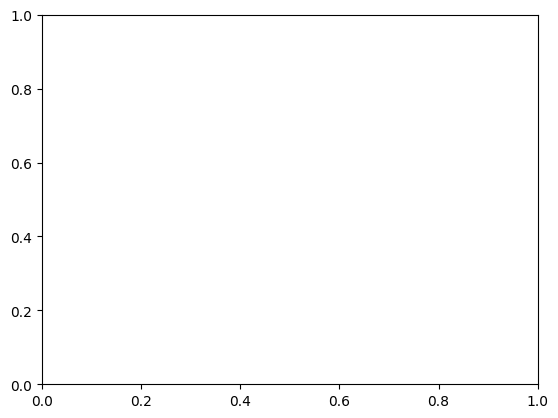

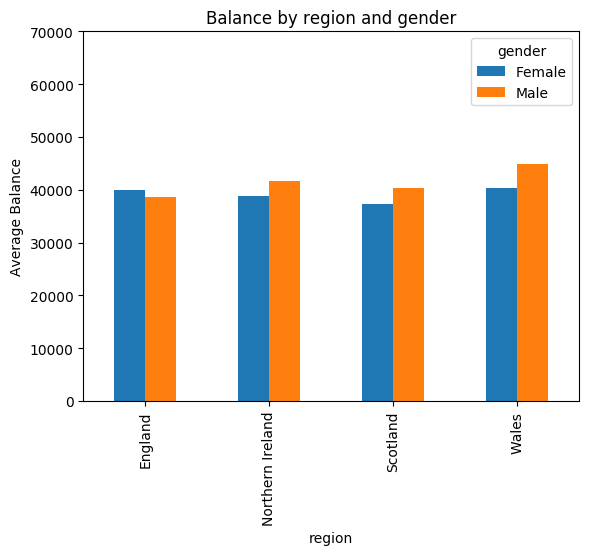

In [0]:
# use OOP + pandas plot
fig,ax1=plt.subplots(nrows=1)
ax1=df.groupby(['region','gender'])['balance'].mean().unstack().plot(kind='bar')
ax1.set_ylim(top=70000)
ax1.set_title("Balance by region and gender")
ax1.set_ylabel('Average Balance')
ax1.grid(False)
plt.show()


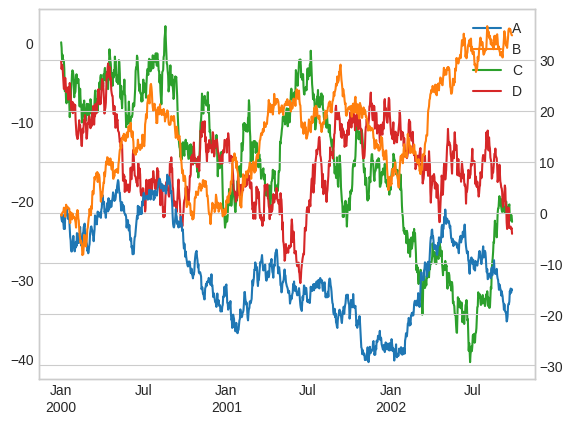

In [0]:
# two y-axies: example, plot conversions and conversion rate on the same chart.
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()
df.plot(secondary_y=['A', 'B'], mark_right=False)

## Seaborn
基于Matplotlib的高级作图工具，特别适合做统计分析。
基本思路: <br>

*   用Seaborn作图
*   用Matplotlib微调
*   (Optional) Theme








In [0]:
# Prepare the data
url="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df_iris=pd.read_csv(url) # a dataframes
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


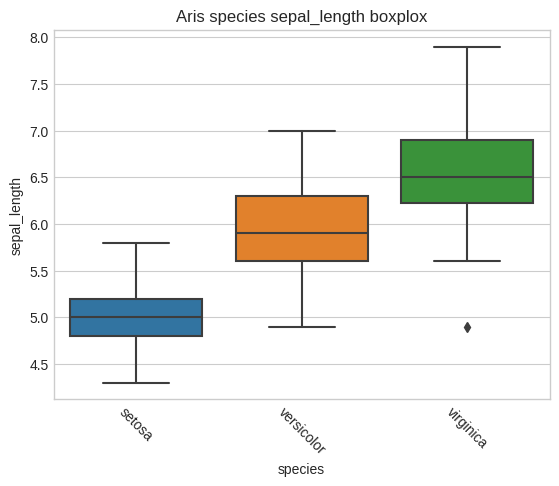

In [0]:
import seaborn as sns
sns.set_style('whitegrid')
#stateful
sns.boxplot(x='species',y='sepal_length',data=df_iris)
plt.xticks(rotation=-45) # adjust xticks
plt.title('Aris species sepal_length boxplox') # add title
plt.show()

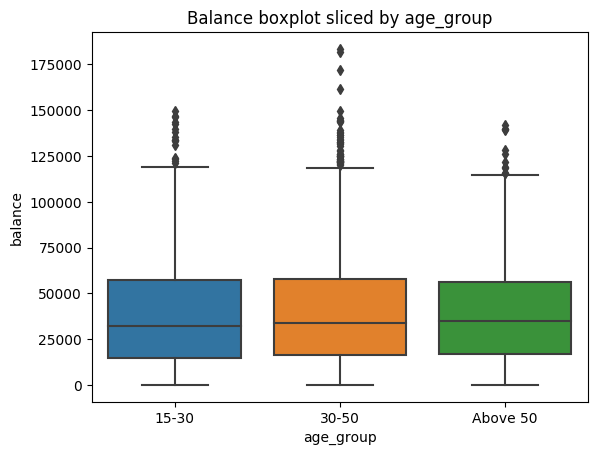

In [0]:
# boxplot UK bank client balance by age group, using seaborn and matplotlib
#OOP stateless
fig,ax2=plt.subplots(nrows=1)
sns.boxplot(x='age_group',y='balance',data=df,ax=ax2) # connect sns and matplotlib
ax2.grid(False)
ax2.set_title("Balance boxplot sliced by age_group")
plt.show()



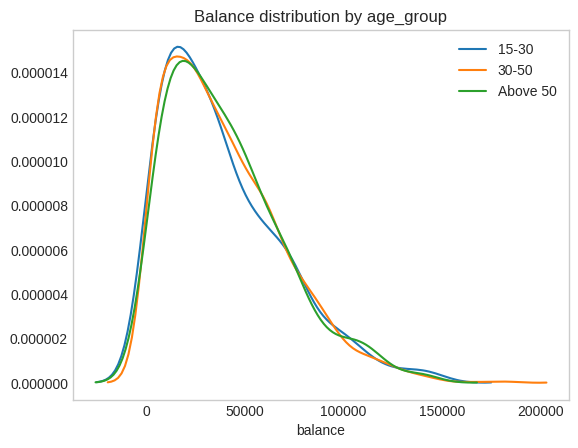

In [0]:
# Balance distribution by difference groups
#oop
fig = plt.figure()
ax3 = fig.add_subplot(1,1,1)

sns.distplot(df.loc[df['age_group']=='15-30','balance'],label='15-30', hist=False,ax=ax3)
sns.distplot(df.loc[df['age_group']=='30-50','balance'],label='30-50', hist=False,ax=ax3)
sns.distplot(df.loc[df['age_group']=='Above 50','balance'],label='Above 50', hist=False,ax=ax3)

ax3.grid(False)
ax3.set_title("Balance distribution by age_group")
ax3.legend()
plt.show()


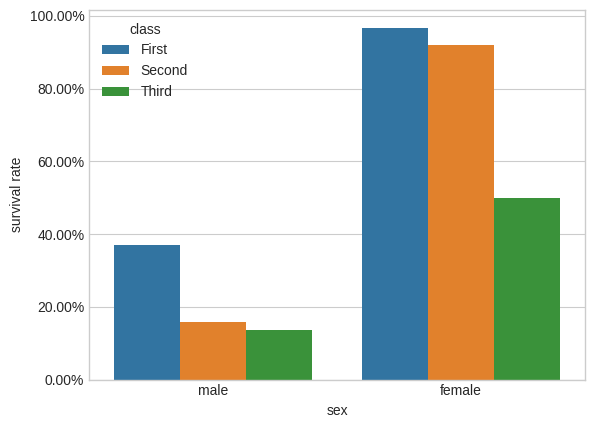

In [0]:
# barplot
df_titanic=sns.load_dataset('titanic')
g=sns.barplot(x="sex", y="survived", hue="class", ci=None,data=df_titanic);
g.set_ylabel('survival rate')
vals=g.get_yticks()
g.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals]) # if you want to show percentage for yticklabels
plt.show()


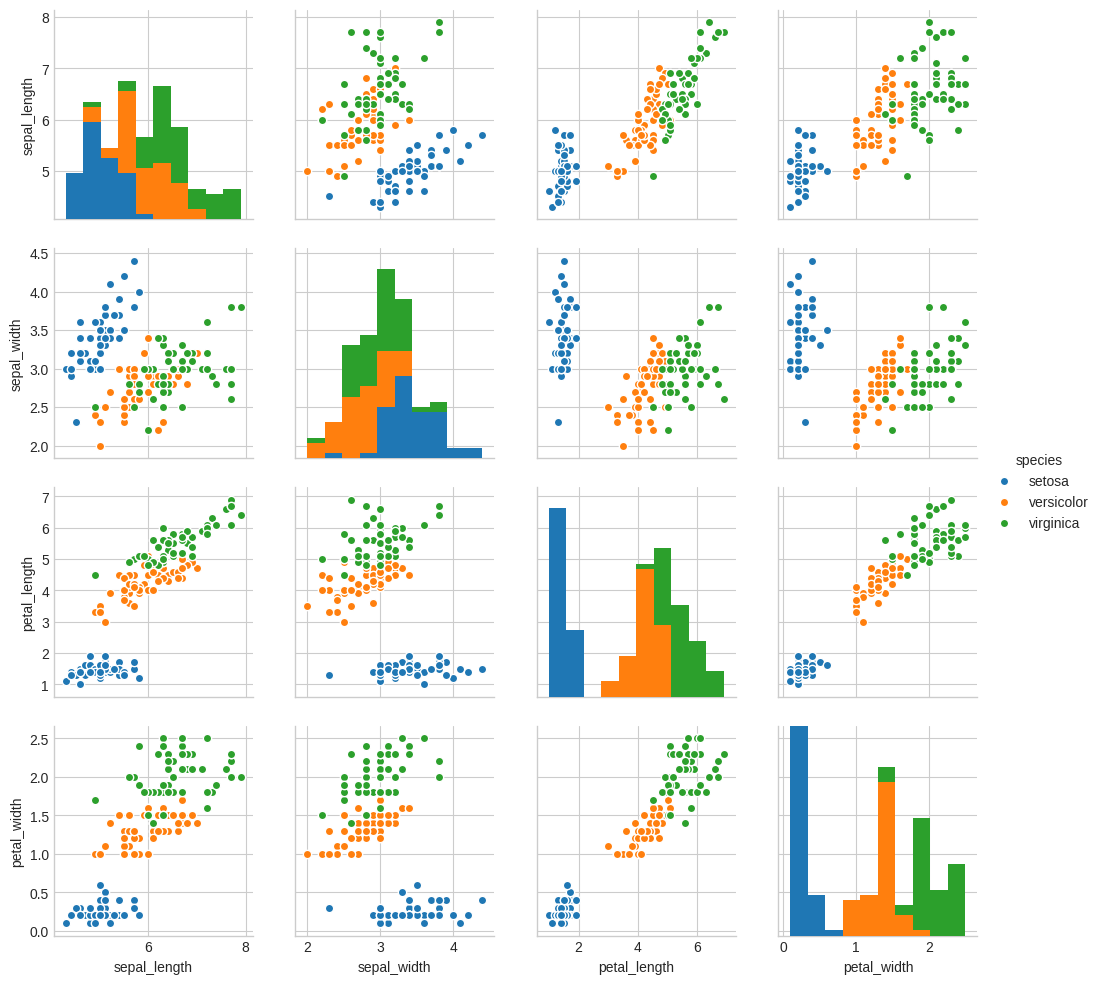

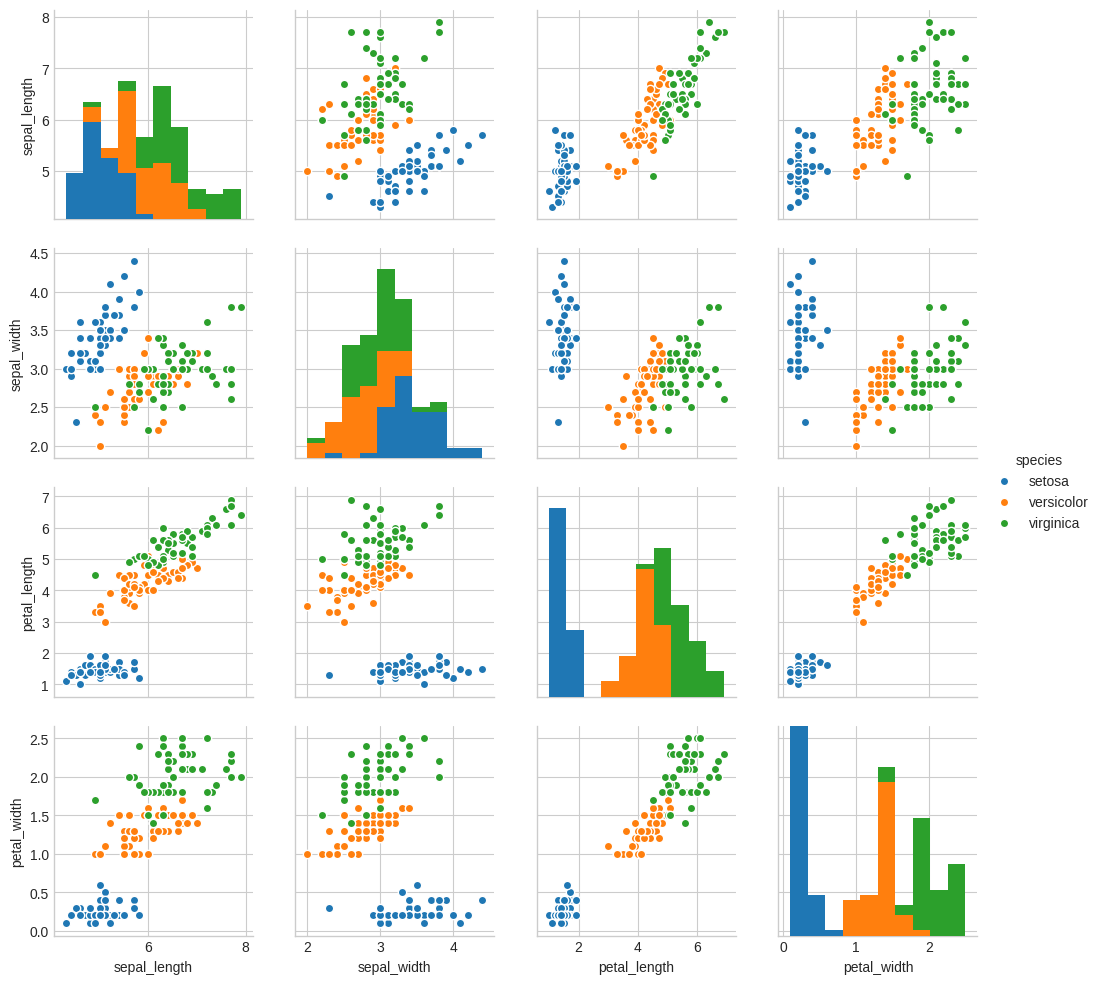

In [0]:
# Scatterplot
g=sns.pairplot(data=df_iris, hue="species")
plt.show()

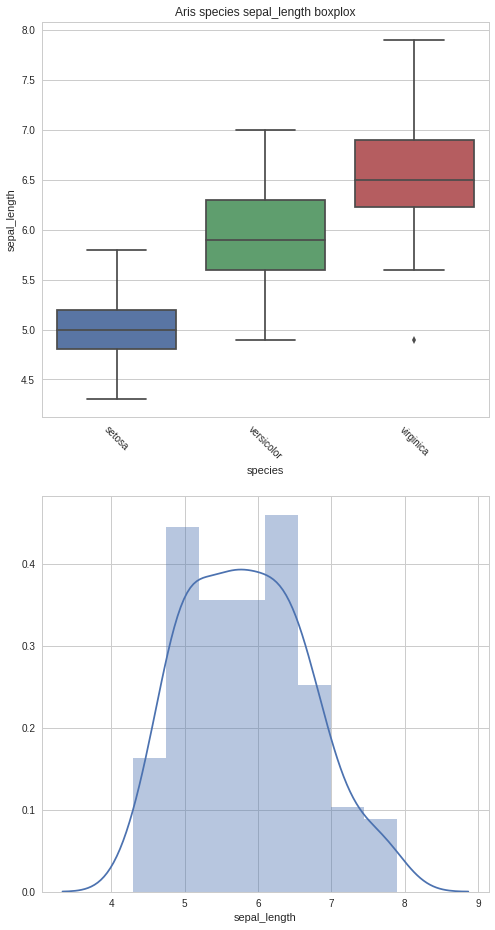

In [0]:
# multiple charts and chart overlap
fig=plt.figure(figsize=(8,16)) # X: control width, Y: control length
plt.subplot(2,1,1) # or ax0=fig.add_subplot(2,1,1)
sns.boxplot(x='species',y='sepal_length',data=df)
plt.xticks(rotation=-45) # adjust xticks
plt.title('Aris species sepal_length boxplox') # add title

plt.subplot(2,1,2)
sns.distplot(df['sepal_length'])

plt.show()


In [0]:
# How to make factorplot: two factors
url="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/exercise.csv"
df=pd.read_csv(url)
df=df.iloc[:,[1,2,3,4,5]]
df.head()

,id,diet,pulse,time,kind
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest
2,1,low fat,88,30 min,rest
3,2,low fat,90,1 min,rest
4,2,low fat,92,15 min,rest


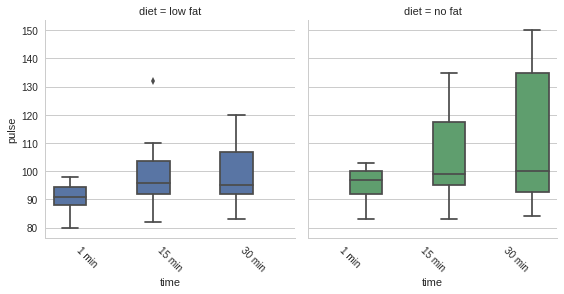

In [0]:
# g is a sns object
g=sns.factorplot(x='time', 
                   y='pulse', 
                   data=df, 
                   hue='diet',  # Color by diet
                   col='diet',  # Separate by diet
                   kind='box') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)

In [0]:
# regression plot
# Simulate data:
x = np.linspace(1,50,num=100)
epsilon = np.random.normal(0,3,size=100)
dt_lin = pd.DataFrame({'x':x, 'y':0.2+0.2*x + epsilon})


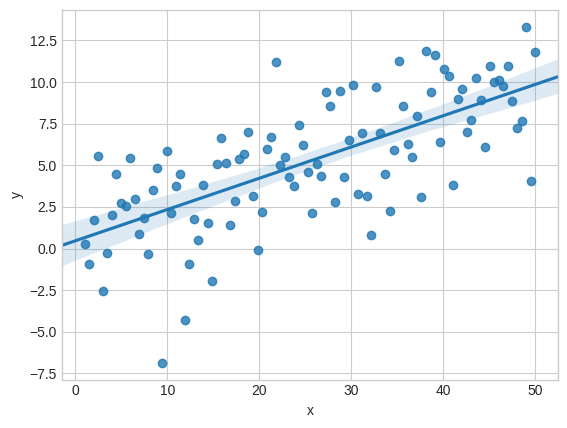

In [0]:
sns.set_style('whitegrid')
sns.regplot(x='x',y='y',data=dt_lin)

plt.show()

Text(0.5,1,u'Clean linear regression')

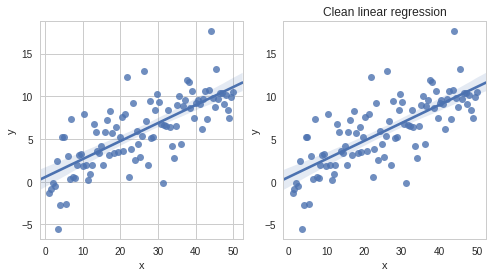

In [0]:
# 微调， 把图形做得更简洁, 把不喜欢的gridline去掉, 加上title
fig=plt.figure(figsize=(8,4))
ax0=fig.add_subplot(121)
sns.regplot(x='x',y='y',data=dt_lin)

ax1=fig.add_subplot(122)
sns.regplot(x='x',y='y',data=dt_lin)
ax1.grid(False)
ax1.set_title('Clean linear regression')

plt.show()

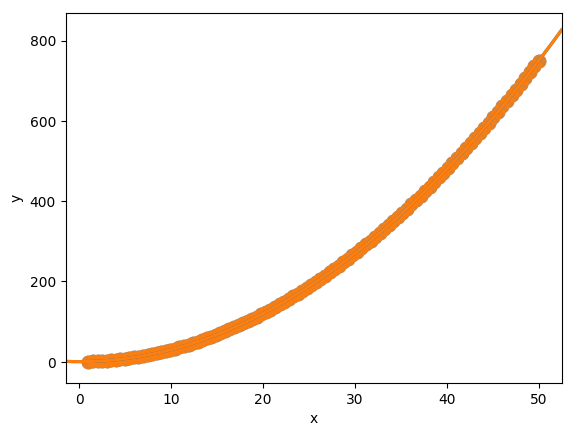

In [0]:
# seaborn fit a polynomial model
x = np.linspace(1,50, num = 100)
dt_poly=pd.DataFrame({'x':x,'y':0.2+0.3*np.power(x,2)})
sns.regplot(x='x', y='y',data=dt_poly,order=2, ci=None, scatter_kws={"s": 80});
plt.show()